In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
big_game = pd.read_excel(r'C:\Users\ASUS.DESKTOP-P2T6A7T\Downloads\UnifiedMentor\Big Game\Big Game Census data\Big Game Census data.xlsx')

In [8]:
big_game.isnull().sum()

Player Name                                                 2
Player Jersey Number                                        3
Player Position                                             3
Player Age                                                  3
Player Weight (lbs.)                                        3
Years Played                                                3
Player Birthplace (city, town, etc.)                        3
Player Birth State                                          3
Player Birthplace (Combo)                                   3
Player College                                              3
Player Team                                                 3
Conference                                                  3
2016 Population Estimates (except where otherwise noted)    3
State GEO ID                                                3
Full GEOID                                                  3
Latitude (player birthplace)                                3
Longitud

In [10]:
big_game.shape

(121, 24)

In [11]:
big_game.dropna(inplace=True)

In [12]:
big_game.isnull().sum()

Player Name                                                 0
Player Jersey Number                                        0
Player Position                                             0
Player Age                                                  0
Player Weight (lbs.)                                        0
Years Played                                                0
Player Birthplace (city, town, etc.)                        0
Player Birth State                                          0
Player Birthplace (Combo)                                   0
Player College                                              0
Player Team                                                 0
Conference                                                  0
2016 Population Estimates (except where otherwise noted)    0
State GEO ID                                                0
Full GEOID                                                  0
Latitude (player birthplace)                                0
Longitud

In [17]:
big_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 117
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Player Name                                               118 non-null    object 
 1   Player Jersey Number                                      118 non-null    object 
 2   Player Position                                           118 non-null    object 
 3   Player Age                                                118 non-null    float64
 4   Player Weight (lbs.)                                      118 non-null    float64
 5   Years Played                                              118 non-null    object 
 6   Player Birthplace (city, town, etc.)                      118 non-null    object 
 7   Player Birth State                                        118 non-null    object 
 8   Player Birthplace (Combo)

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


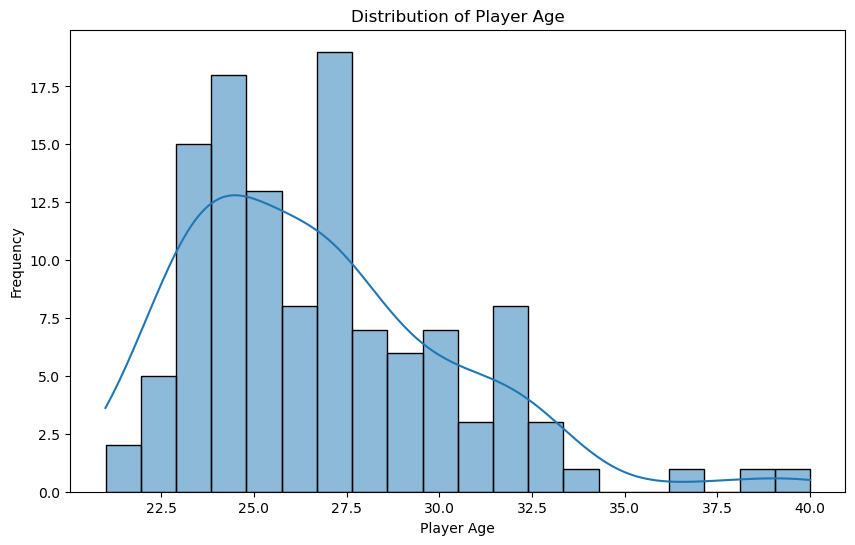

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(big_game['Player Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Player Age')
plt.ylabel('Frequency')
plt.show()

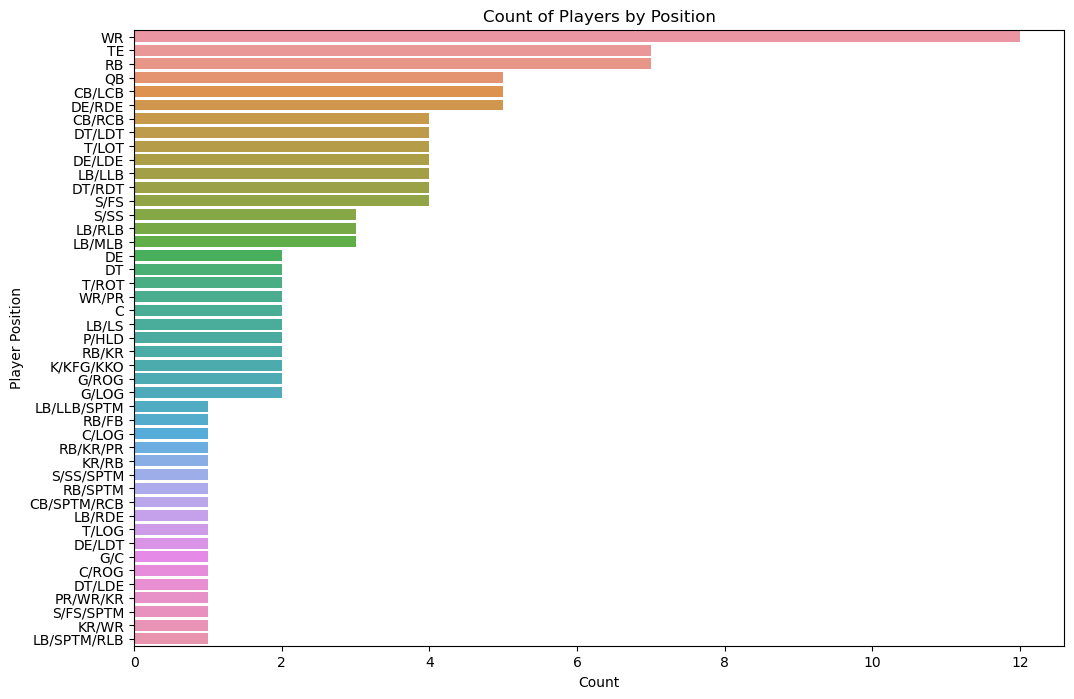

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=big_game, y='Player Position', order=big_game['Player Position'].value_counts().index)
plt.title('Count of Players by Position')
plt.xlabel('Count')
plt.ylabel('Player Position')
plt.show()

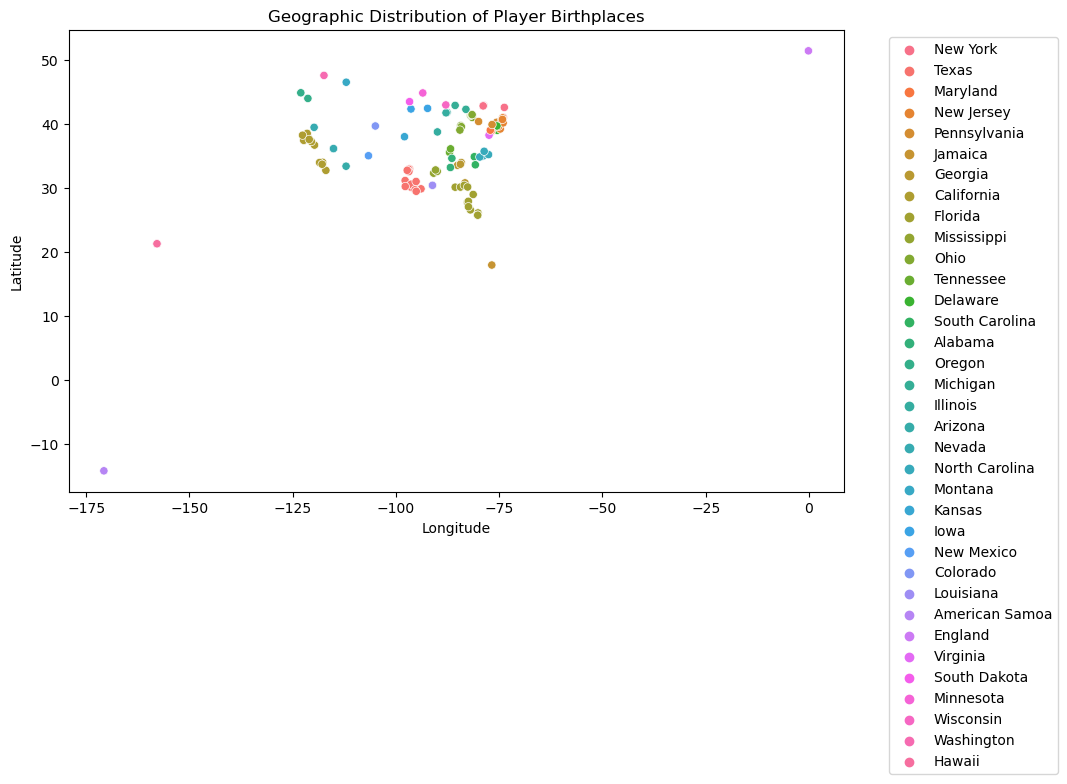

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=big_game, x='Longitude (player birthplace)', y='Latitude (player birthplace)', hue='Player Birth State')
plt.title('Geographic Distribution of Player Birthplaces')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



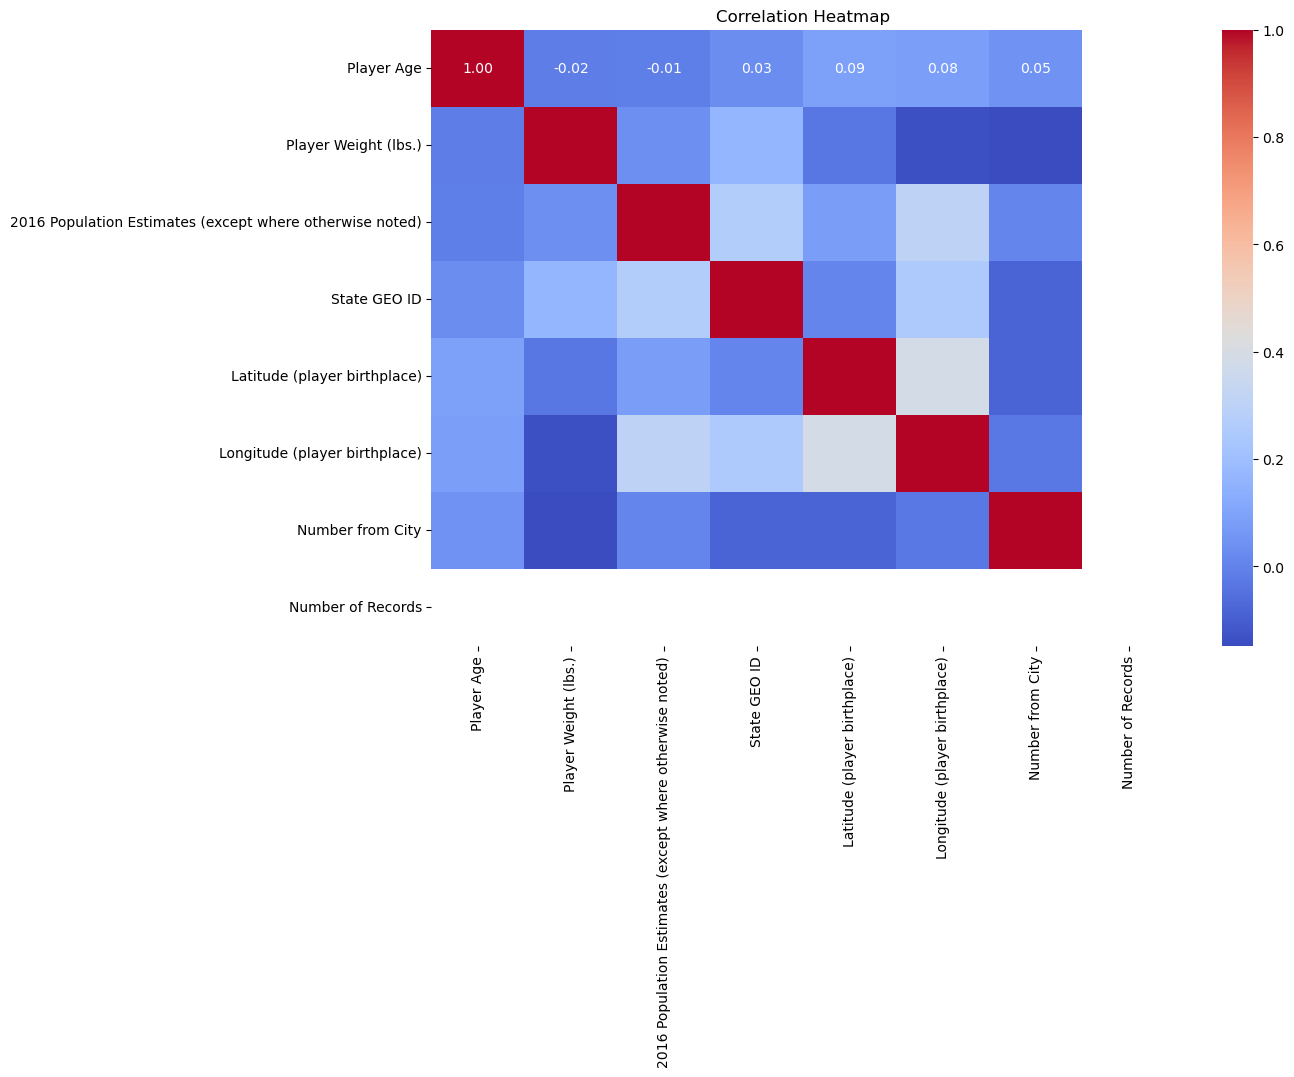

In [32]:
numeric_data = big_game.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


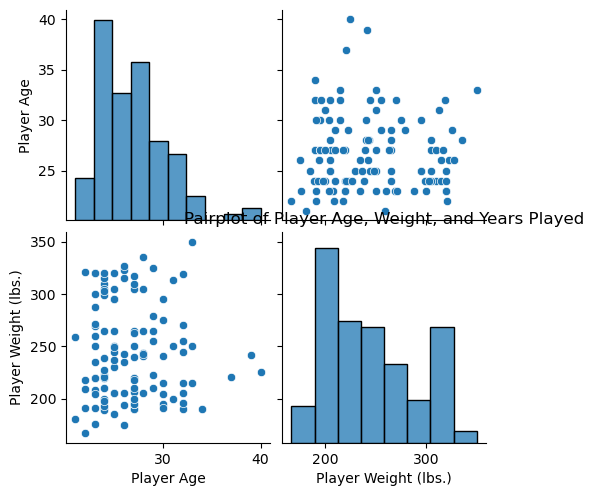

In [22]:
sns.pairplot(big_game[['Player Age', 'Player Weight (lbs.)', 'Years Played']])
plt.title('Pairplot of Player Age, Weight, and Years Played')
plt.show()

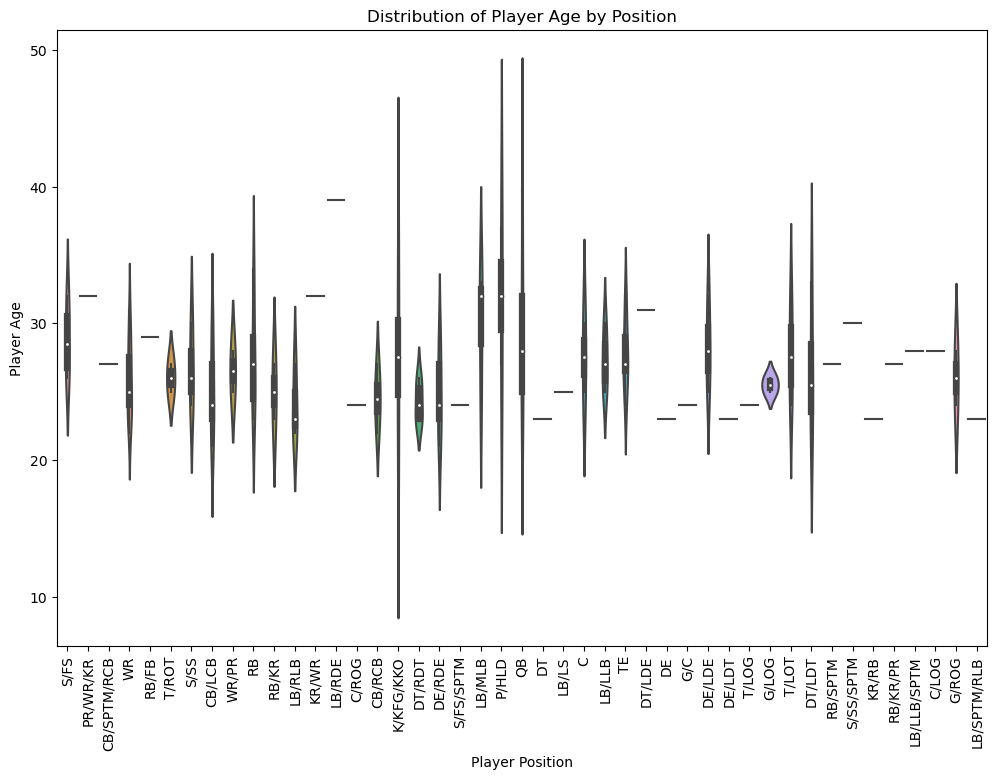

In [23]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Player Position', y='Player Age', data=big_game)
plt.title('Distribution of Player Age by Position')
plt.xlabel('Player Position')
plt.ylabel('Player Age')
plt.xticks(rotation=90)
plt.show()

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


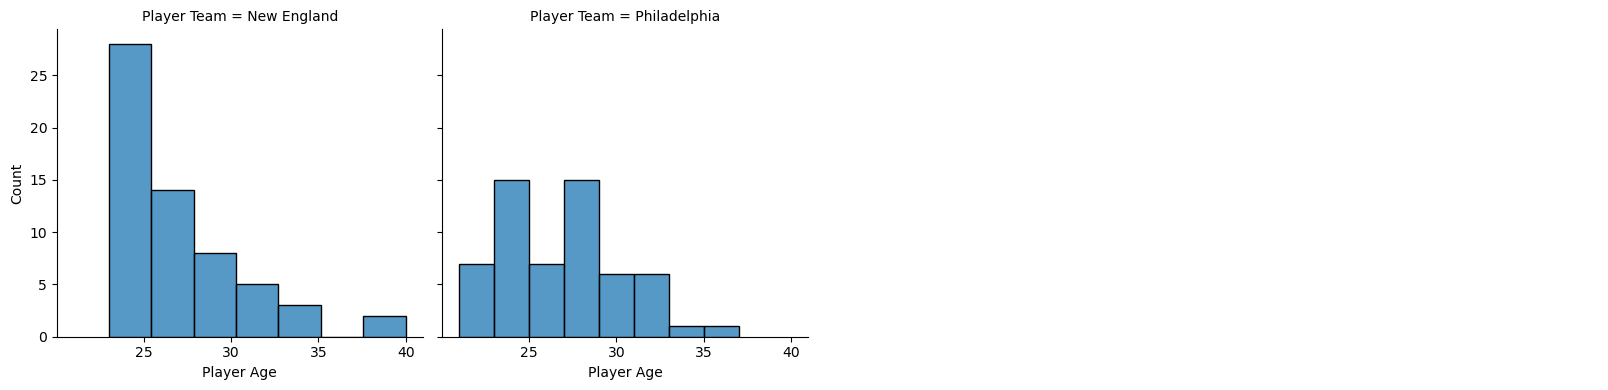

In [24]:
g = sns.FacetGrid(big_game, col='Player Team', col_wrap=4, height=4)
g.map(sns.histplot, 'Player Age')
g.add_legend()
plt.show()